In [1]:
!pip install librosa soundfile numpy matplotlib scikit-learn tensorflow



In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import tensorflow as tf
from sklearn.model_selection import train_test_split

print("NumPy:", np.__version__)
print("Librosa:", librosa.__version__)
print("TensorFlow:", tf.__version__)


NumPy: 2.0.2
Librosa: 0.11.0
TensorFlow: 2.19.0


Sample rate: 16000
Audio length (samples): 85335


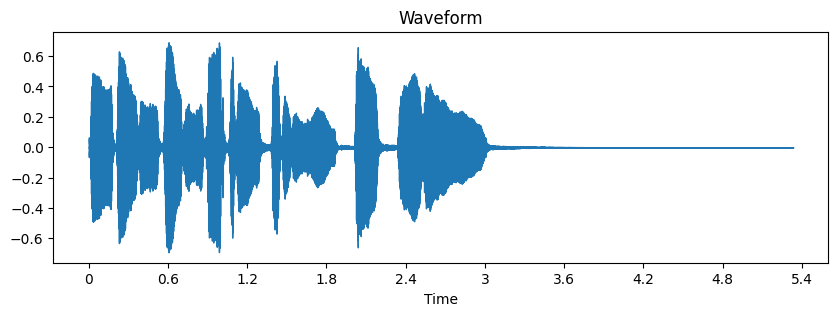

In [3]:
# Load a sample audio file from librosa
audio_path = librosa.ex('trumpet')

y, sr = librosa.load(audio_path, sr=16000)

print("Sample rate:", sr)
print("Audio length (samples):", len(y))

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.show()

# Play audio
import IPython.display as ipd
ipd.Audio(y, rate=sr)



In [4]:
# Download ESC-50 dataset
!git clone https://github.com/karolpiczak/ESC-50.git


Cloning into 'ESC-50'...
remote: Enumerating objects: 4199, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 4199 (delta 62), reused 34 (delta 34), pack-reused 4130 (from 1)
Receiving objects: 100% (4199/4199), 878.77 MiB | 16.37 MiB/s, done.
Resolving deltas: 100% (292/292), done.
Updating files: 100% (2011/2011), done.


In [5]:
!ls


ESC-50	sample_data


In [6]:
!ls ESC-50


audio  esc50.gif  LICENSE  meta  pytest.ini  README.md	requirements.txt  tests


In [7]:
!ls ESC-50/audio | head

1-100032-A-0.wav
1-100038-A-14.wav
1-100210-A-36.wav
1-100210-B-36.wav
1-101296-A-19.wav
1-101296-B-19.wav
1-101336-A-30.wav
1-101404-A-34.wav
1-103298-A-9.wav
1-103995-A-30.wav


In [8]:
import os

esc_path = "ESC-50/audio"

# List first 10 audio files
files = os.listdir(esc_path)
files[:10]



['5-217186-A-16.wav',
 '3-155584-A-14.wav',
 '4-195497-A-11.wav',
 '2-124564-A-15.wav',
 '4-175855-A-43.wav',
 '1-54065-B-45.wav',
 '3-187710-A-11.wav',
 '5-245040-A-35.wav',
 '1-68628-A-27.wav',
 '3-112557-B-23.wav']

In [9]:
import pandas as pd

meta = pd.read_csv("ESC-50/meta/esc50.csv")
meta.head()


,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [10]:
selected_classes = [
    "siren",
    "car_horn",
    "alarm_clock",
    "human_voice",
    "background_noise"
]

filtered_meta = meta[meta["category"].isin(selected_classes)]

filtered_meta["category"].value_counts()


,count
category,
car_horn,40
siren,40


In [1]:
meta[meta["category"].isin([
    "car_horn",
    "siren",
    "engine",
    "crying_baby"
])]["category"].value_counts()



NameError: name 'meta' is not defined

In [2]:
import pandas as pd

meta = pd.read_csv("ESC-50/meta/esc50.csv")
meta.head()


FileNotFoundError: [Errno 2] No such file or directory: 'ESC-50/meta/esc50.csv'

In [3]:
!git clone https://github.com/karolpiczak/ESC-50.git


Cloning into 'ESC-50'...
remote: Enumerating objects: 4199, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 4199 (delta 62), reused 34 (delta 34), pack-reused 4130 (from 1)
Receiving objects: 100% (4199/4199), 878.77 MiB | 30.10 MiB/s, done.
Resolving deltas: 100% (292/292), done.
Updating files: 100% (2011/2011), done.


In [4]:
!ls ESC-50/meta


esc50.csv  esc50-human.xlsx


In [5]:
!ls ESC-50/meta


esc50.csv  esc50-human.xlsx


In [6]:
import pandas as pd

meta = pd.read_csv("ESC-50/meta/esc50.csv")
meta.head()


,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [7]:
meta[meta["category"].isin([
    "car_horn",
    "siren",
    "engine",
    "crying_baby"
])]["category"].value_counts()


,count
category,
car_horn,40
engine,40
crying_baby,40
siren,40


In [8]:
import IPython.display as ipd

for category in selected_classes:
    sample = filtered_meta[filtered_meta["category"] == category].iloc[0]
    audio_file = os.path.join(esc_path, sample["filename"])

    print(f"Playing: {category}")
    ipd.display(ipd.Audio(audio_file))


NameError: name 'selected_classes' is not defined

In [9]:
selected_classes = ["car_horn", "siren", "engine", "crying_baby"]


In [10]:
import pandas as pd
import os

# Make sure ESC-50 is cloned and exists
esc_path = "ESC-50/audio"

# Load metadata
meta = pd.read_csv("ESC-50/meta/esc50.csv")

# Filter only the selected classes
filtered_meta = meta[meta["category"].isin(selected_classes)].reset_index(drop=True)


In [11]:
import IPython.display as ipd

for category in selected_classes:
    sample = filtered_meta[filtered_meta["category"] == category].iloc[0]
    audio_file = os.path.join(esc_path, sample["filename"])

    print(f"Playing: {category}")
    ipd.display(ipd.Audio(audio_file))


Playing: car_horn


Playing: siren


Playing: engine


Playing: crying_baby


In [12]:
import numpy as np
import librosa


In [13]:
X = []  # features
y = []  # labels


In [14]:
class_labels = {
    "car_horn": 0,
    "engine": 1,
    "crying_baby": 2,
    "siren": 3
}


In [15]:
for _, row in filtered_meta.iterrows():
    file_path = os.path.join(esc_path, row['filename'])

    # Load audio, 16kHz, first 5 seconds
    audio, sr = librosa.load(file_path, sr=16000, duration=5)

    # Pad if shorter than 5 seconds
    if len(audio) < sr * 5:
        audio = np.pad(audio, (0, sr*5 - len(audio)))

    # Extract MFCCs
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)

    # Take mean across time axis
    mfcc_mean = np.mean(mfcc, axis=1)

    X.append(mfcc_mean)
    y.append(class_labels[row['category']])


In [16]:
X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (160, 40)
y shape: (160,)


In [17]:
# Check for NaNs
print("Any NaNs in X?", np.isnan(X).any())

# Check label distribution
from collections import Counter
print(Counter(y))


Any NaNs in X? False
Counter({np.int64(0): 40, np.int64(1): 40, np.int64(2): 40, np.int64(3): 40})


In [18]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (128, 40)
X_test shape: (32, 40)
y_train shape: (128,)
y_test shape: (32,)


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Number of classes
num_classes = 4

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Show the model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,764 (53.77 KB)

 Trainable params: 13,764 (53.77 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,          # small dataset, 30 epochs is enough
    batch_size=16,
    verbose=1
)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.2724 - loss: 22.6341 - val_accuracy: 0.4062 - val_loss: 3.9599
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4178 - loss: 11.5360 - val_accuracy: 0.2812 - val_loss: 6.3043
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3758 - loss: 10.0725 - val_accuracy: 0.3750 - val_loss: 5.5564
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4486 - loss: 7.9979 - val_accuracy: 0.5312 - val_loss: 4.6458
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4244 - loss: 7.2509 - val_accuracy: 0.5312 - val_loss: 4.1448
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4125 - loss: 6.5460 - val_accuracy: 0.5312 - val_loss: 3.9795
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5311 - loss: 6.4310 - val_accuracy: 0.5625 - val_loss: 3.5708
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4845 - loss: 4.6673 - val_accuracy: 0.5312 - val_loss: 2.8373
Epoc

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")


Test Accuracy: 68.75%


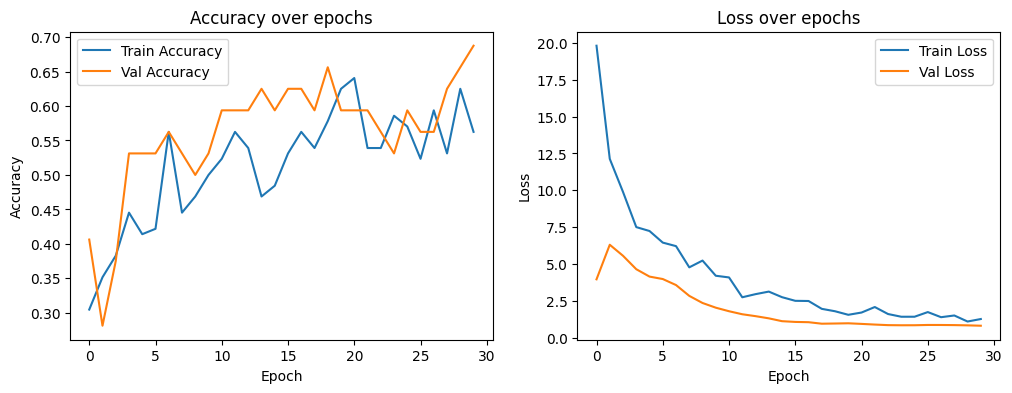

In [22]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


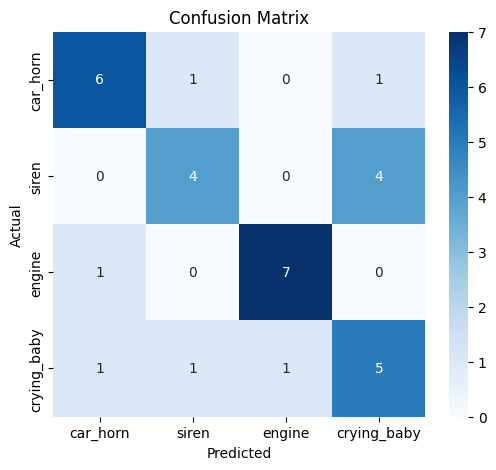

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=selected_classes, yticklabels=selected_classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [24]:
model.save("audio_classifier_model.h5")


In [26]:
model.save("audio_classifier_model.keras")


In [27]:
test_audio_path = "/mnt/data/fad73b0e-f424-4304-a642-0777bbf35f28.wav"


In [28]:
import librosa
import numpy as np

# Load audio
audio, sr = librosa.load(test_audio_path, sr=16000, duration=5)

# Pad if shorter than 5s
if len(audio) < sr*5:
    audio = np.pad(audio, (0, sr*5 - len(audio)))

# Extract MFCCs
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
mfcc_mean = np.mean(mfcc, axis=1)

# Reshape for model
mfcc_input = mfcc_mean.reshape(1, -1)

# Predict
pred = model.predict(mfcc_input)
pred_class = selected_classes[np.argmax(pred)]

print(f"Predicted class: {pred_class}")


/tmp/ipython-input-1570965956.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(test_audio_path, sr=16000, duration=5)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/fad73b0e-f424-4304-a642-0777bbf35f28.wav'

In [29]:
from google.colab import files

uploaded = files.upload()  # upload your WAV file
for filename in uploaded.keys():
    print(filename)
    test_audio_path = f"/content/{filename}"


Saving mixkit-ambulance-siren-us-1642.wav to mixkit-ambulance-siren-us-1642.wav
mixkit-ambulance-siren-us-1642.wav


In [30]:
audio, sr = librosa.load(test_audio_path, sr=16000, duration=5)


In [31]:
import librosa
import numpy as np

# Load audio
audio, sr = librosa.load(test_audio_path, sr=16000, duration=5)

# Pad if shorter than 5s
if len(audio) < sr*5:
    audio = np.pad(audio, (0, sr*5 - len(audio)))

# Extract MFCCs
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
mfcc_mean = np.mean(mfcc, axis=1)

# Reshape for model
mfcc_input = mfcc_mean.reshape(1, -1)

# Predict
pred = model.predict(mfcc_input)
pred_class = selected_classes[np.argmax(pred)]

print(f"Predicted class: {pred_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
Predicted class: car_horn
